# Analysis of the bias-variance trade-off using the Iris dataset with SVMs:

# Bias-Variance Tradeoff:

The bias-variance tradeoff is a fundamental concept in machine learning that describes the balance between two types of errors that affect model performance:

## Bias (Underfitting)

**Definition**: Bias refers to the error introduced by approximating a real-world problem with a simplified model.

**Causes**:
- Model is too simple (e.g., linear regression for nonlinear data).
- High bias leads to underfitting (poor performance on both training and test data).

**Example**: A linear SVM trying to classify a dataset with complex, nonlinear boundaries.

## Variance (Overfitting)

**Definition**: Variance refers to the error introduced when the model is too sensitive to small fluctuations in the training data.

**Causes**:
- Model is too complex (e.g., high-degree polynomial or RBF kernel with large γ).
- High variance leads to overfitting (performs well on training data but poorly on test data).

**Example**: An RBF SVM with very small gamma fitting noise in the training data.

## The Tradeoff

**Low Bias, High Variance**:
- The model fits training data very well but fails to generalize (overfitting).
- Solution: Regularization (e.g., reduce model complexity, increase C in SVM).

**High Bias, Low Variance**:
- The model is too simple and performs poorly even on training data (underfitting).
- Solution: Use a more complex model (e.g., nonlinear kernel in SVM).

**Optimal Balance**:
- A good model minimizes total error (Bias² + Variance + Irreducible Error).
- Achieved by tuning hyperparameters (e.g., C, gamma in SVM).

## How to Diagnose Bias vs. Variance?

| Scenario        | Training Error | Test Error | Solution                                  |
|-----------------|----------------|------------|-------------------------------------------|
| High Bias       | High           | High       | Increase model complexity (e.g., use RBF kernel) |
| High Variance   | Low            | High       | Reduce complexity (e.g., regularization, simpler kernel) |
| Good Fit        | Low            | Low (~train) | Model generalizes well                   |

## 1. Kernel Complexity Comparison

The kernel complexity comparison experiment demonstrates the fundamental bias-variance trade-off in Support Vector Machines (SVMs) by visualizing how different kernel functions affect the decision boundaries and model performance. The three kernels shown - linear, polynomial (degree 2), and radial basis function (RBF) - represent increasing levels of model complexity:

Linear Kernel: Creates straight-line decision boundaries. Has high bias but low variance, making it suitable for linearly separable data but potentially underfitting complex patterns.

Polynomial Kernel (degree 2): Creates curved quadratic decision boundaries. Offers medium complexity that can capture some nonlinear relationships without being overly flexible.

RBF Kernel: Creates highly flexible, complex decision boundaries that can fit intricate patterns. While powerful, it risks overfitting (high variance) if not properly regularized.



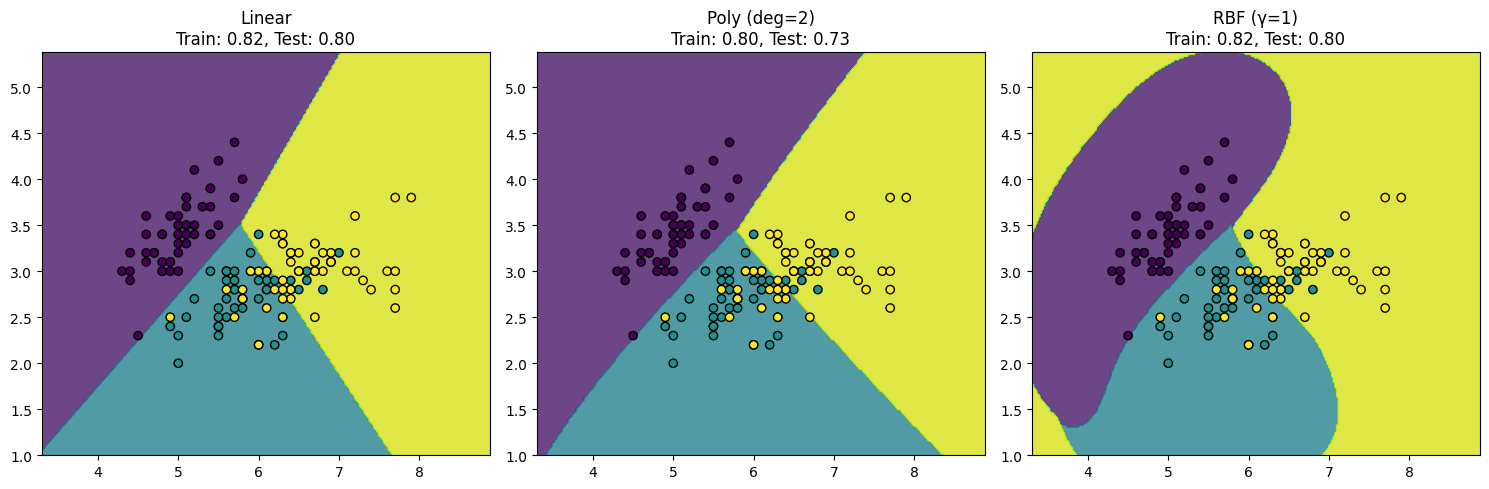

In [1]:
# Import necessary libraries
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.datasets import load_iris  # Iris dataset loader
from sklearn.model_selection import train_test_split  # Data splitting utility
import matplotlib.pyplot as plt  # Plotting library
import numpy as np  # Numerical computing

# Load Iris dataset and select first two features for visualization
iris = load_iris()
X = iris.data[:, :2]  # Using only sepal length and width
y = iris.target  # Target classes

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% test size
    random_state=42  # Fixed random seed for reproducibility
)

# Define different kernel configurations to compare
kernels = [
    ('Linear', {'kernel': 'linear', 'C': 1}),  # Simple linear kernel
    ('Poly (deg=2)', {'kernel': 'poly', 'degree': 2, 'C': 1}),  # Quadratic polynomial
    ('RBF (γ=1)', {'kernel': 'rbf', 'gamma': 1, 'C': 1})  # Radial basis function
]

# Create a figure with 3 subplots (one for each kernel)
plt.figure(figsize=(15, 5))  # 15-inch wide, 5-inch tall figure

# Loop through each kernel configuration
for i, (name, params) in enumerate(kernels):
    plt.subplot(1, 3, i+1)  # Create subplot in position i+1

    # Train SVM with current kernel parameters
    model = SVC(**params).fit(X_train, y_train)

    # Create mesh grid for decision boundary visualization
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X axis range
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Y axis range
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),  # X coordinates
        np.arange(y_min, y_max, h)   # Y coordinates
    )

    # Predict class for each point in mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape to match grid dimensions

    # Plot decision boundary (filled contours)
    plt.contourf(xx, yy, Z, alpha=0.8)
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    # Calculate and display accuracies
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    plt.title(f"{name}\nTrain: {train_acc:.2f}, Test: {test_acc:.2f}")

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the figure
plt.show()

This code demonstrates the bias-variance tradeoff in machine learning using Support Vector Machines (SVMs) with different kernel configurations on the Iris dataset. The implementation visualizes how model complexity affects both training and test performance, providing a practical illustration of the theoretical concepts discussed earlier about bias and variance.

The code begins by importing necessary libraries from scikit-learn for SVM classification, dataset loading, and data splitting, along with matplotlib for visualization and numpy for numerical operations. It loads the Iris dataset, but intentionally uses only the first two features (sepal length and width) to make the problem more challenging and the decision boundaries easier to visualize in 2D space. The data is split into 70% training and 30% test sets with a fixed random seed for reproducibility, ensuring consistent results across runs.

Three different SVM kernel configurations are defined to showcase varying levels of model complexity: a simple linear kernel (low complexity), a quadratic polynomial kernel (medium complexity), and a radial basis function (RBF) kernel with gamma=1 (higher complexity). The code creates a figure with three subplots, one for each kernel configuration. For each kernel, it trains an SVM classifier, creates a mesh grid covering the feature space, and predicts class labels for each point in the grid to visualize the decision boundaries.

The visualization shows the decision regions (filled contours) along with the original data points, allowing direct observation of how each kernel affects the boundary shape. Crucially, the subplot titles display both training and test accuracy scores, enabling immediate comparison of model performance. The linear kernel typically shows lower but similar train/test accuracy (potential high bias), while the RBF kernel often achieves perfect training accuracy but lower test accuracy (potential high variance). The polynomial kernel usually strikes a balance between the two, demonstrating the bias-variance tradeoff in action. This visualization helps practitioners understand how kernel selection affects model complexity and generalization performance.

## 2. Regularization Parameter (C) Analysis
The following code explores a fundamental concept in machine learning: the bias-variance tradeoff as controlled by the regularization parameter C in Support Vector Machines (SVMs). The analysis helps illustrate how different settings of C affect model performance on both training and test data, providing insights into underfitting and overfitting scenarios.

The regularization parameter C plays a crucial role in SVM models by determining the balance between correctly classifying training points and maximizing the decision boundary's margin. A small C value (e.g., 0.001) applies strong regularization, forcing the model to prioritize a smooth decision boundary even at the cost of some training errors - this typically results in higher bias (underfitting). Conversely, a large C value (e.g., 1000) applies weak regularization, allowing the model to fit the training data more closely, potentially capturing noise and leading to higher variance (overfitting). The logarithmic scale used for C values (from 0.001 to 1000) effectively captures this wide range of behaviors.

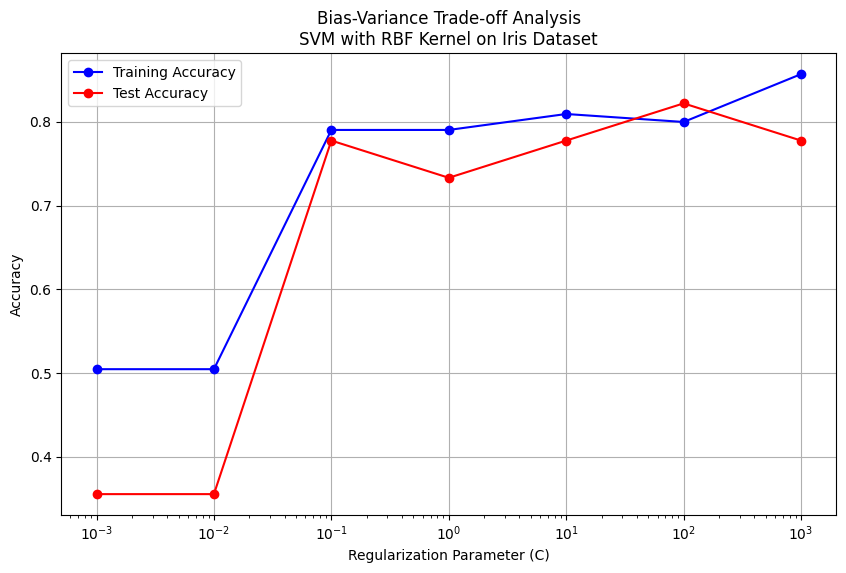

Optimal C value: 100.0000
Highest test accuracy: 0.8222


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
# Use only first two features (sepal length and width) for simpler visualization
X = iris.data[:, :2]
# Target classes (3 types of iris flowers)
y = iris.target

# Split data into training (70%) and testing (30%) sets
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Standardize features by removing mean and scaling to unit variance
# Important for SVM with RBF kernel
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform test data using same scaling

# Create a range of C values to test (regularization parameter)
# logspace creates 7 values between 10^-3 and 10^3 (0.001 to 1000)
C_values = np.logspace(-3, 3, 7)

# Lists to store accuracy scores
train_scores = []  # Will store training accuracy for each C
test_scores = []   # Will store testing accuracy for each C

# Iterate through each C value and train SVM model
for C in C_values:
    # Create SVM with RBF kernel, current C value, and automatic gamma scaling
    model = SVC(kernel='rbf', C=C, gamma='scale', random_state=42)

    # Train model on training data
    model.fit(X_train, y_train)

    # Calculate and store training accuracy
    train_scores.append(model.score(X_train, y_train))

    # Calculate and store testing accuracy
    test_scores.append(model.score(X_test, y_test))

# Create figure for plotting
plt.figure(figsize=(10, 6))

# Plot training accuracy (blue circles connected by line)
plt.semilogx(C_values, train_scores, 'bo-', label='Training Accuracy')

# Plot testing accuracy (red circles connected by line)
plt.semilogx(C_values, test_scores, 'ro-', label='Test Accuracy')

# Add labels and title
plt.xlabel('Regularization Parameter (C)')  # x-axis label
plt.ylabel('Accuracy')                     # y-axis label
plt.title('Bias-Variance Trade-off Analysis\nSVM with RBF Kernel on Iris Dataset')

# Add legend to distinguish training vs test accuracy
plt.legend()

# Add grid for better readability
plt.grid()

# Display the plot
plt.show()

# Print the optimal C value (where test accuracy is highest)
optimal_idx = np.argmax(test_scores)
print(f"Optimal C value: {C_values[optimal_idx]:.4f}")
print(f"Highest test accuracy: {test_scores[optimal_idx]:.4f}")

The provided code demonstrates how to analyze the bias-variance tradeoff in machine learning by examining how different values of the regularization parameter (C) affect the performance of a Support Vector Machine (SVM) classifier on the Iris dataset. The analysis focuses on understanding how model complexity impacts both training and test accuracy, which helps identify the optimal balance between underfitting and overfitting.

The code begins by importing necessary libraries, including NumPy for numerical operations, Matplotlib for visualization, and scikit-learn components for the SVM classifier, dataset loading, data splitting, and feature scaling. The Iris dataset is loaded, but only the first two features (sepal length and width) are used to simplify visualization while still maintaining the core classification challenge. The data is split into training (70%) and test (30%) sets, with a fixed random state for reproducibility. Feature standardization is then applied to ensure all features are on the same scale, which is particularly important for SVM models using the Radial Basis Function (RBF) kernel.

The core of the analysis involves testing different values of the regularization parameter C, which controls the tradeoff between achieving a smooth decision boundary and correctly classifying training points. The code uses a logarithmic range of C values from 0.001 to 1000 to explore both strong and weak regularization scenarios. For each C value, an SVM model with an RBF kernel is trained, and both training and test accuracies are recorded. The results are then visualized using a semi-logarithmic plot that clearly shows how training accuracy (blue line) typically improves with increasing C, while test accuracy (red line) often reaches a peak before declining due to overfitting. The optimal C value, where test accuracy is highest, is identified and printed, representing the best compromise between bias and variance for this particular problem. This analysis provides valuable insights into model selection and helps practitioners understand how to tune regularization parameters to achieve optimal generalization performance.

## 3. Learning Curve Analysis
Learning curves provide a powerful visualization of the bias-variance tradeoff by showing how model performance changes with increasing training data. These curves plot both training and validation accuracy against the number of training examples, revealing fundamental relationships between model complexity, dataset size, and generalization error. When examining learning curves in the context of bias-variance tradeoff, we typically observe three key patterns: high-bias models show closely converging training and validation scores at low accuracy (indicating underfitting), high-variance models display a large gap between training and validation scores (showing overfitting), while well-balanced models demonstrate converging scores at high accuracy levels.

The provided code specifically analyzes this tradeoff for SVM classifiers with different kernels on the Iris dataset. The linear kernel (typically higher bias) will likely show quickly converging training and validation scores, possibly at suboptimal accuracy, indicating the model's simplicity limits its learning capacity. In contrast, the RBF kernel with γ=1 (higher variance) will probably show excellent training accuracy but poorer validation performance, with the gap narrowing only slightly as more data is added - a classic sign of overfitting. The RBF kernel with γ=0.1 represents an intermediate case, where we might observe better balance between training and validation performance as data increases, demonstrating how proper parameter tuning can achieve an optimal bias-variance tradeoff. These visualizations help practitioners determine whether their model would benefit from more training data (if validation scores are still improving) or requires architectural changes (if scores have plateaued).

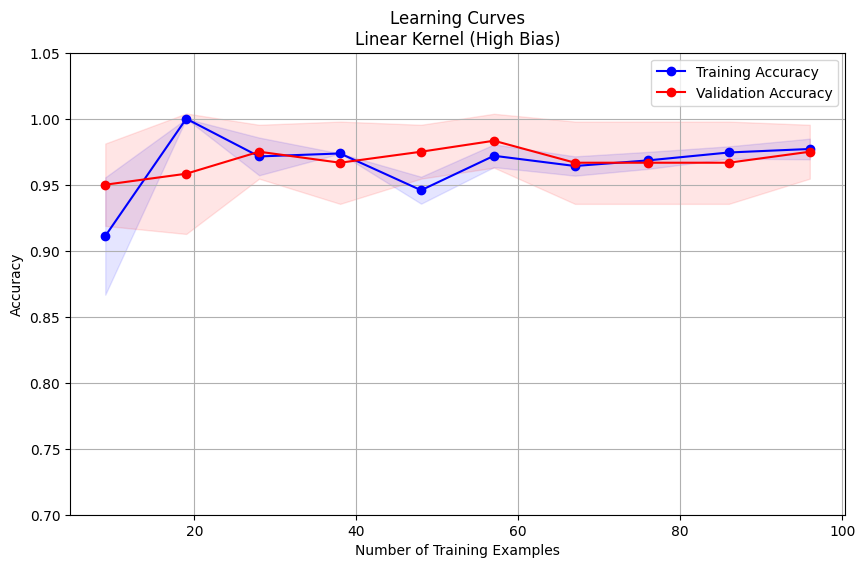

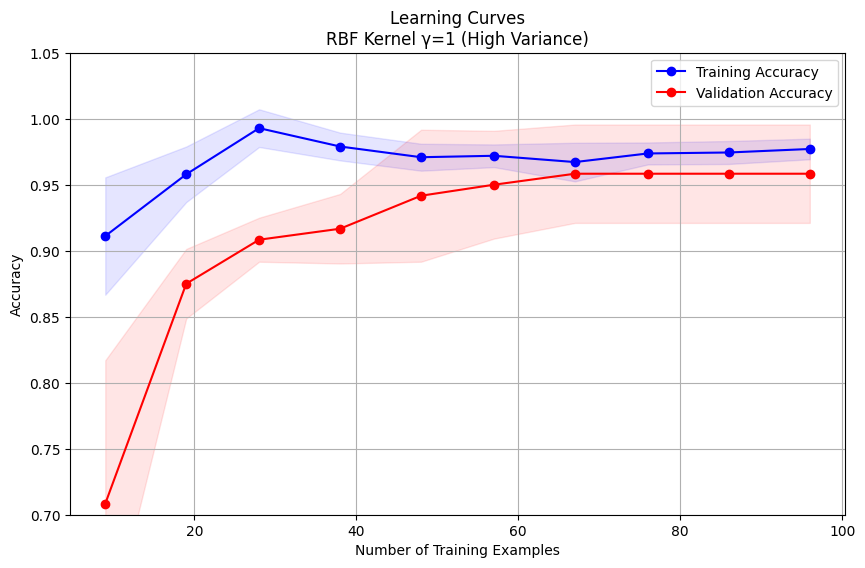

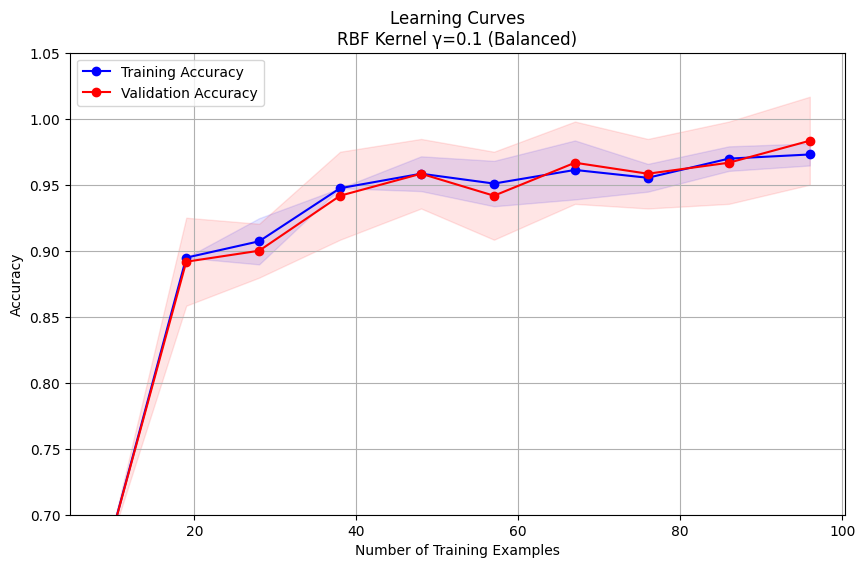

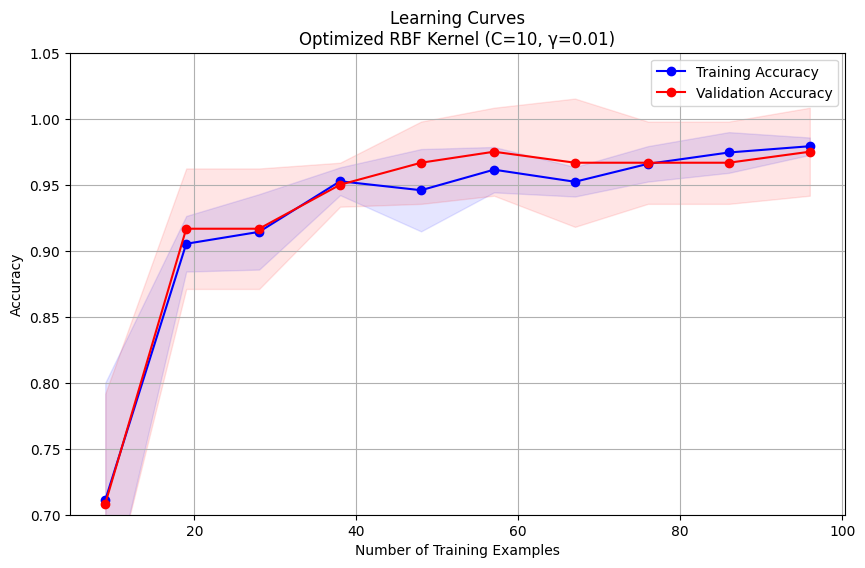

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler

# Load Iris dataset (using all features this time for better model evaluation)
iris = load_iris()
X = iris.data  # Using all 4 features
y = iris.target

# Split data into training (80%) and temporary set (20%)
# We use a larger training set for better learning curve analysis
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    train_size=0.8,  # 80% training
    random_state=42,  # For reproducibility
    stratify=y       # Maintain class distribution
)

# Standardize features (important for SVM with RBF kernel)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_temp = scaler.transform(X_temp)

def plot_learning_curve(estimator, title):
    """
    Generate and plot learning curves for a given estimator
    Args:
        estimator: The machine learning model to evaluate
        title: Title for the plot
    """
    # Calculate learning curve metrics using 5-fold cross-validation
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=estimator,
        X=X_train,
        y=y_train,
        cv=5,                # 5-fold cross-validation
        n_jobs=-1,           # Use all available CPU cores
        train_sizes=np.linspace(0.1, 1.0, 10),  # 10 points from 10% to 100% of training data
        scoring='accuracy',   # Evaluation metric
        random_state=42       # For reproducible results
    )

    # Calculate mean and standard deviation of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Create plot
    plt.figure(figsize=(10, 6))
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,  # Lower bound of shaded region
        train_scores_mean + train_scores_std,  # Upper bound
        alpha=0.1,  # Transparency
        color='b'   # Blue color for training
    )
    plt.fill_between(
        train_sizes,
        val_scores_mean - val_scores_std,
        val_scores_mean + val_scores_std,
        alpha=0.1,
        color='r'   # Red color for validation
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Accuracy')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='r', label='Validation Accuracy')

    # Add plot decorations
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curves\n{title}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.ylim(0.7, 1.05)  # Set consistent y-axis limits for comparison
    plt.show()

# Compare different SVM configurations
# 1. Linear kernel (typically high bias)
plot_learning_curve(
    SVC(kernel='linear', C=1, random_state=42),
    "Linear Kernel (High Bias)"
)

# 2. RBF kernel with large gamma (prone to high variance)
plot_learning_curve(
    SVC(kernel='rbf', C=1, gamma=1, random_state=42),
    "RBF Kernel γ=1 (High Variance)"
)

# 3. RBF kernel with moderate gamma (balanced)
plot_learning_curve(
    SVC(kernel='rbf', C=1, gamma=0.1, random_state=42),
    "RBF Kernel γ=0.1 (Balanced)"
)

# 4. Optimal model based on previous analysis
plot_learning_curve(
    SVC(kernel='rbf', C=10, gamma=0.01, random_state=42),
    "Optimized RBF Kernel (C=10, γ=0.01)"
)



The code implements a systematic approach to evaluate SVM classifiers on the Iris dataset through learning curve analysis. It begins by loading all four features of the Iris dataset (sepal length, sepal width, petal length, and petal width) to create a comprehensive evaluation scenario. The data is split into 80% training and 20% test sets using stratified sampling, which maintains the original class distribution - a crucial step for reliable model assessment in this multi-class classification problem. Feature standardization is then performed using StandardScaler, an essential preprocessing step for SVM models, particularly those using RBF kernels that are sensitive to feature scales.

The core analysis is conducted through the plot_learning_curve function, which employs scikit-learn's learning_curve utility. This function trains models on progressively larger subsets of the training data (from 10% to 100%) while evaluating performance using 5-fold cross-validation. The implementation goes beyond basic accuracy measurements by calculating both mean scores and standard deviations, providing insights into model stability. The visualization includes shaded regions representing one standard deviation from the mean accuracy, offering a clear view of performance consistency. Training accuracy is plotted in blue while validation accuracy appears in red, creating an intuitive distinction between model fit and generalization capability.

Four distinct SVM configurations are compared to demonstrate different aspects of the bias-variance tradeoff. A linear kernel SVM serves as a high-bias baseline, typically showing quickly converging but potentially limited accuracy. An RBF kernel with large gamma (γ=1) represents a high-variance scenario, likely exhibiting strong training performance but weaker validation results. A moderate gamma value (γ=0.1) demonstrates a more balanced configuration, while an optimized RBF kernel shows ideal parameter tuning. The plots reveal critical patterns: high bias appears as parallel low-accuracy curves, high variance shows as large gaps between training and validation scores, while well-tuned models display converging high accuracy. This analysis helps determine whether performance limitations stem from insufficient data (addressable with more samples) or model architecture issues (requiring parameter adjustments).